<a href="https://colab.research.google.com/github/Devanshu-04/4375-ML-LAB/blob/main/Decision_Tree_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Decision Tree Classification Model

We will use the built in Pima Indians Diabetes dataset. It is available as part of the SKlearn datasets. We have made it easily available for you.

In [1]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/pima-indians-diabetes.csv", header=None, names=col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [5]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)

In [7]:
clf.get_depth()
clf.feature_importances_

array([0.0556187 , 0.        , 0.24287033, 0.15074471, 0.42808575,
       0.02471295, 0.09796757])

In [8]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions)) # predictions contain predicted values (derived from probability with 0.5 threshold)
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.70      0.65      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]
Accuracy:  0.7662337662337663


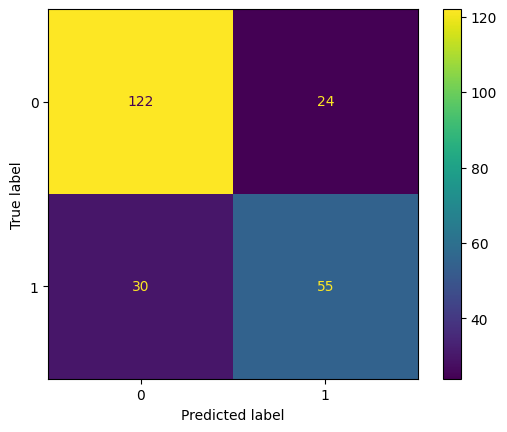

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


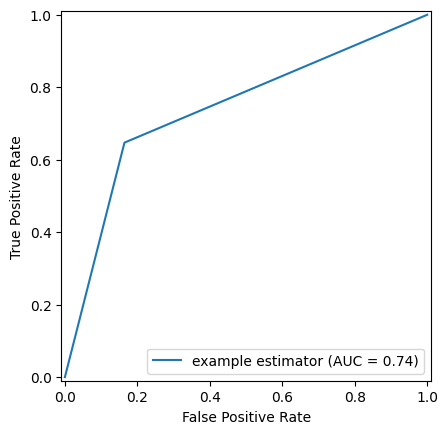

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [11]:
!pip install graphviz

In [12]:
X.columns

Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')

In [13]:
classes = y.unique()

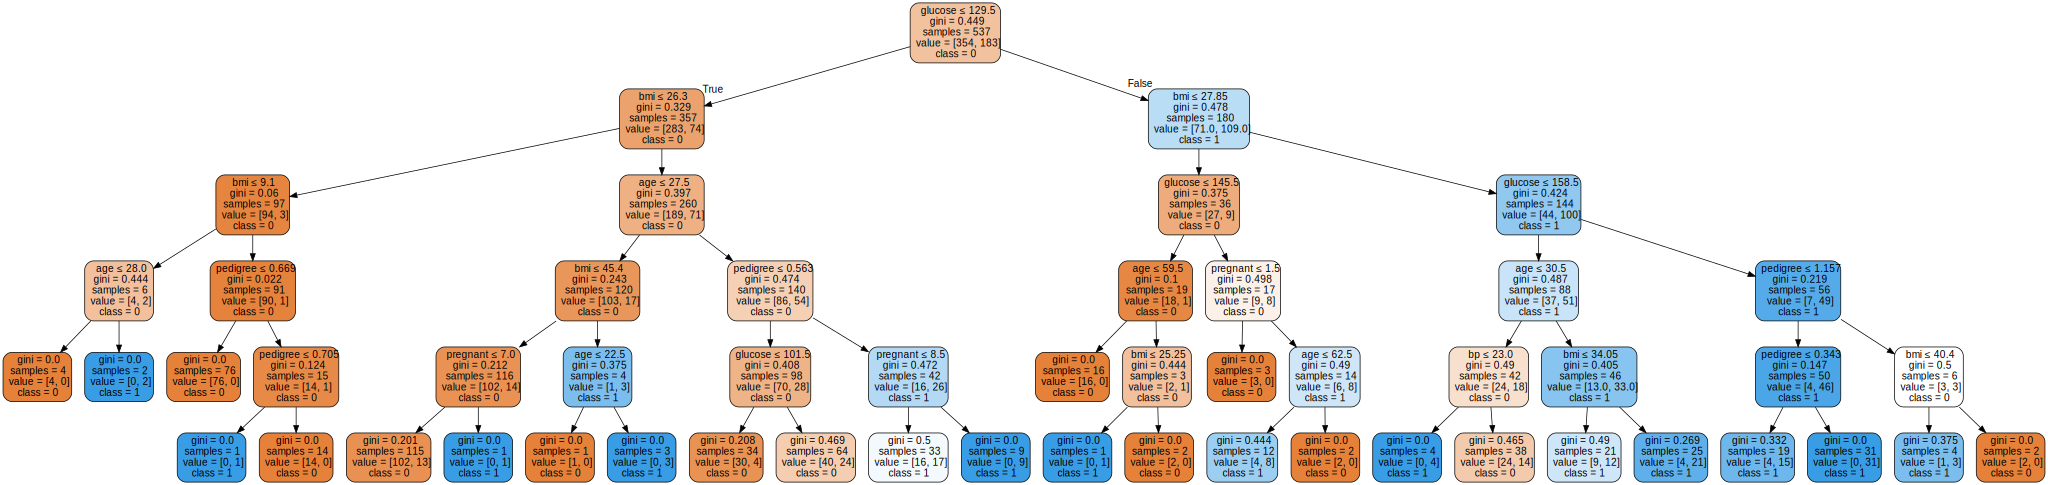

In [14]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names = feature_cols,class_names=['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Excercise 1

Construct the following models on the same dataset:
- Bagging
- Random Forest
- Adaboost

Compare their performance and write a short paragraph on which one is the best. You are free to change the hyperparameters.


In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.76      0.62      0.68        85

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



In [16]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       146
           1       0.80      0.60      0.68        85

    accuracy                           0.80       231
   macro avg       0.80      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



In [17]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       146
           1       0.70      0.59      0.64        85

    accuracy                           0.76       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



### Application on Cuisines Dataset

In [18]:
import pandas as pd
cuisines_df = pd.read_csv("https://raw.githubusercontent.com/a-nagar/datasets/refs/heads/main/asian_cuisines.csv")
cuisines_df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
cuisines_df.shape
cuisines_df['cuisine'].value_counts()

,count
cuisine,
indian,799
thai,799
chinese,799
japanese,799
korean,799


In [20]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

,cuisine
0,indian
1,indian
2,indian
3,indian
4,indian


In [21]:
cuisines_label_df.value_counts()

,count
cuisine,
indian,799
thai,799
chinese,799
japanese,799
korean,799


In [22]:
cuisine_labels_distinct = cuisines_label_df.unique()

In [23]:
cuisine_labels_distinct

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [24]:
cuisines_feature_df = cuisines_df.drop(['cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

In [26]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
predictions = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)

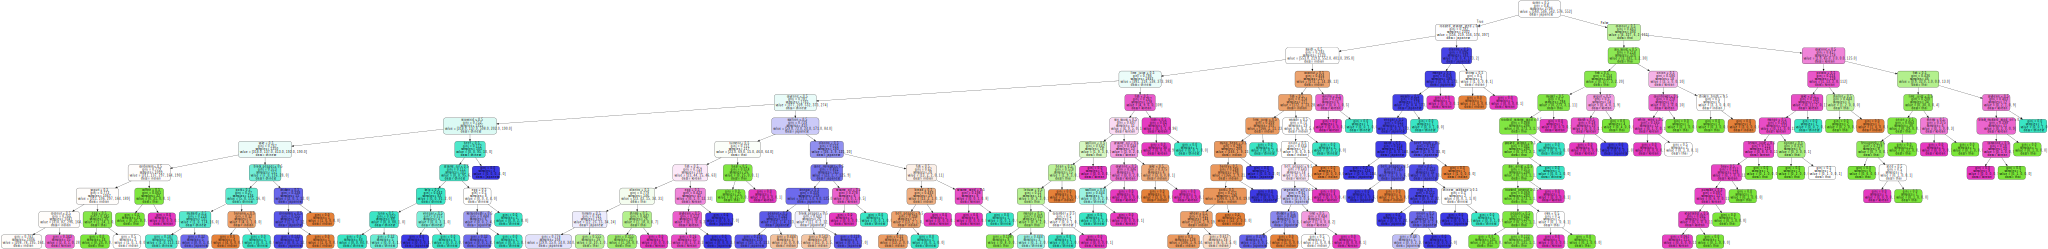

In [27]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=cuisines_feature_df.columns,
                     class_names=cuisine_labels_distinct,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [28]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.38      0.88      0.53       239
      indian       0.90      0.74      0.81       253
    japanese       0.82      0.31      0.45       237
      korean       0.70      0.57      0.62       223
        thai       0.83      0.58      0.68       247

    accuracy                           0.62      1199
   macro avg       0.73      0.61      0.62      1199
weighted avg       0.73      0.62      0.62      1199



In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     chinese       0.78      0.75      0.77       239
      indian       0.92      0.92      0.92       253
    japanese       0.82      0.80      0.81       237
      korean       0.83      0.78      0.80       223
        thai       0.82      0.90      0.86       247

    accuracy                           0.83      1199
   macro avg       0.83      0.83      0.83      1199
weighted avg       0.83      0.83      0.83      1199



In [30]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.53      0.64      0.58       239
      indian       0.84      0.73      0.78       253
    japanese       0.46      0.65      0.54       237
      korean       0.73      0.46      0.56       223
        thai       0.70      0.60      0.65       247

    accuracy                           0.62      1199
   macro avg       0.65      0.62      0.62      1199
weighted avg       0.65      0.62      0.62      1199



In [31]:
bag = BaggingClassifier()
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.68      0.71      0.69       239
      indian       0.89      0.87      0.88       253
    japanese       0.78      0.76      0.77       237
      korean       0.76      0.66      0.71       223
        thai       0.74      0.83      0.78       247

    accuracy                           0.77      1199
   macro avg       0.77      0.77      0.77      1199
weighted avg       0.77      0.77      0.77      1199



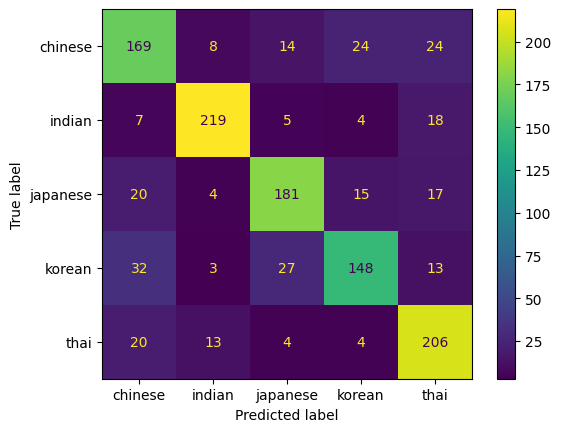

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# Exercise 2

The accuracy for this dataset is quite low. Can you try any other method that increases the accuracy. You can try either Random Forest or Adaboost. What do you notice?

# Parameter Grid Builder for Parameter Tuning

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

dt_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('dt', DecisionTreeClassifier())])
params = [{'dt__max_depth': [3, 5, 7, 9],
         'dt__min_samples_leaf': [2, 3, 5]}]

gs_dt = GridSearchCV(dt_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_dt.fit(cuisines_feature_df, cuisines_label_df)
print(gs_dt.best_params_)
# find best model score
print(gs_dt.score(cuisines_feature_df, cuisines_label_df))


{'dt__max_depth': 9, 'dt__min_samples_leaf': 3}
0.6475594493116396


In [36]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rf = RandomForestClassifier()

params = {'max_depth': [5, 7, 9],
          'n_estimators': [50, 100, 200],
          'max_features': ['sqrt', 'log2']
          }

grid = GridSearchCV(rf, params, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(cuisines_feature_df, cuisines_label_df)

print(grid.best_params_)
# find best model score
print(grid.score(cuisines_feature_df, cuisines_label_df))

{'max_depth': 9, 'max_features': 'log2', 'n_estimators': 200}
0.8020025031289112


# Exercise 3

Try other combination of hyperparameters for Random Forest and AdaBoost models and check how good of an accuracy you can obtain.

In [42]:
ada = AdaBoostClassifier()
params = {'n_estimators': [50, 100, 200, 300],
          'learning_rate': [0.01, 0.1, 1, 5]
          }

grid = GridSearchCV(ada, params, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(cuisines_feature_df, cuisines_label_df)

print(grid.best_params_)
print(grid.score(cuisines_feature_df, cuisines_label_df))

{'learning_rate': 1, 'n_estimators': 300}
0.7244055068836045


In [43]:
rf = RandomForestClassifier()
params = {'max_depth': [5, 7, 9, 10],
          'n_estimators': [50, 100, 200],
          'max_features': ['sqrt', 'log2', 'log10']
          }

grid = GridSearchCV(rf, params, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(cuisines_feature_df, cuisines_label_df)

print(grid.best_params_)
print(grid.score(cuisines_feature_df, cuisines_label_df))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}
0.823279098873592
